### Probe 2

author: steeve.laquitaine@epfl.ch

### Setup

In [1]:
# listen to changes
%load_ext autoreload
%autoreload 2

import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np 
import spikeinterface as si

# set project path
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj85/home/laquitai/spikebias/"
os.chdir(PROJ_PATH)

from src.nodes.utils import get_config

# SETUP PARAMETERS
SAMPFREQ = 20000  # hz

# silico
data_conf, param_conf_sili = get_config(
    "vivo_horvath", "probe_2"
).values()
PREPRO_PATH = data_conf["preprocessing"]["output"]["trace_file_path"]


# FIGURE SETTINGS
FIGSIZE = (1.05, 2.10)
# colors
COLOR_V = [0.4, 0.4, 0.4]
# axes
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 6  # 5-7 with Nature neuroscience as reference
plt.rcParams["lines.linewidth"] = 0.3
plt.rcParams["axes.linewidth"] = 0.3  # 1
plt.rcParams["axes.spines.top"] = False
plt.rcParams["xtick.major.width"] = 0.3  # 0.8 #* 1.3
plt.rcParams["xtick.minor.width"] = 0.3  # 0.8 #* 1.3
plt.rcParams["ytick.major.width"] = 0.3  # 0.8 #* 1.3
plt.rcParams["ytick.minor.width"] = 0.3  # 0.8 #* 1.3
plt.rcParams["xtick.major.size"] = 3.5 * 1.1
plt.rcParams["xtick.minor.size"] = 2 * 1.1
plt.rcParams["ytick.major.size"] = 3.5 * 1.1
plt.rcParams["ytick.minor.size"] = 2 * 1.1
# legend
savefig_cfg = {"transparent": True, "dpi": 300}
legend_cfg = {"frameon": False, "handletextpad": 0.1}
tight_layout_cfg = {"pad": 0.5}
LG_FRAMEON = False  # no legend frame

2024-06-18 14:38:27,016 - root - utils.py - get_config - INFO - Reading experiment config.
2024-06-18 14:38:27,025 - root - utils.py - get_config - INFO - Reading experiment config. - done


In [3]:
def plot_probe(Recording):
    Probe = Recording.get_probe()

    # plot file contact with ids
    fig, ax = plt.subplots(1, 1, figsize=(4, 10))
    ax.plot(
        Probe.contact_positions[:, 0],
        Probe.contact_positions[:, 1],
        "o",
        markerfacecolor="w",
        color="k",
        markersize=6,
    )
    for ix in range(len(Probe.contact_positions)):
        if ix % 1 == 0:
            ax.text(
                Probe.contact_positions[ix, 0],
                Probe.contact_positions[ix, 1],
                "%s" % (str(Recording.channel_ids[ix])),
                size=12,
                zorder=100,
                color="r",
            )
    ax.set_xlabel("x", fontsize=20)
    ax.set_ylabel("y", fontsize=20)

    # highlight order
    # first site
    ax.plot(
        Probe.contact_positions[0, 0],
        Probe.contact_positions[0, 1],
        "ro",
        markersize=10,
    )

    # highlight order
    # second site
    ax.plot(
        Probe.contact_positions[1, 0],
        Probe.contact_positions[1, 1],
        "bo",
        markersize=10,
    )

    # highlight order
    # third site
    ax.plot(
        Probe.contact_positions[2, 0],
        Probe.contact_positions[2, 1],
        "go",
        markersize=10,
    )

### Load dataset

In [ ]:
Recording = si.load_extractor(PREPRO_PATH)

### Plot

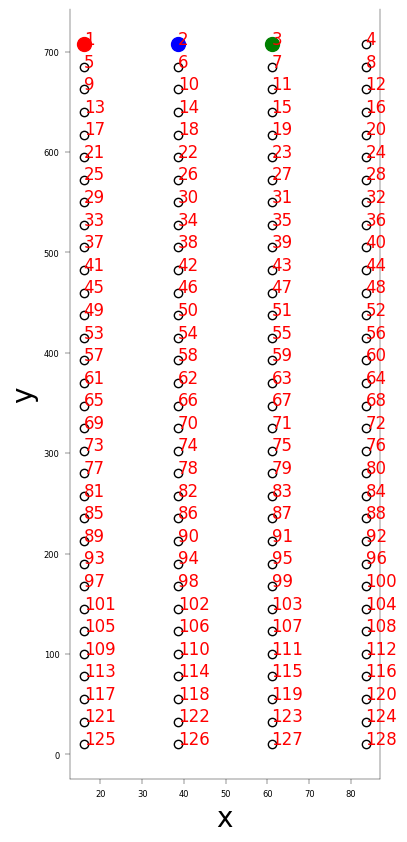

In [4]:
plot_probe(Recording)